In [1]:
import re
import time

ips = []
patt = re.compile(r"\d+\.\d+\.\d+\.\d+")
with open("oct2019.txt") as infile:
    for line in infile:
        parts = line.split()
        if len(parts) > 2 and patt.fullmatch(parts[2]):
            ips.append(parts[2])
ips = set(ips)
ips


{'114.118.91.64',
 '98.207.32.236',
 '177.79.72.26',
 '114.5.81.67',
 '81.4.125.221',
 '73.26.245.243',
 '190.181.4.94',
 '58.254.132.239',
 '49.49.178.202',
 '40.124.4.131',
 '36.153.23.181',
 '59.149.117.108',
 '167.99.75.174',
 '200.11.150.238',
 '198.199.107.41',
 '24.246.203.93',
 '104.244.73.130',
 '34.97.189.128',
 '203.130.192.242',
 '58.56.9.131',
 '134.209.90.220',
 '190.115.1.49',
 '27.66.218.33',
 '58.218.209.239',
 '168.128.86.35',
 '119.18.52.219',
 '106.12.123.125',
 '51.38.128.30',
 '179.84.151.25',
 '46.127.9.168',
 '118.217.216.100',
 '210.105.192.76',
 '83.144.105.158',
 '123.20.43.57',
 '27.64.112.32',
 '59.25.197.146',
 '106.75.141.91',
 '159.203.185.239',
 '190.67.116.12',
 '60.190.114.82',
 '142.93.172.64',
 '84.254.28.47',
 '54.37.66.73',
 '119.29.245.158',
 '183.136.132.15',
 '125.212.218.56',
 '218.4.169.82',
 '116.106.18.237',
 '51.75.123.195',
 '132.148.129.180',
 '27.254.90.106',
 '18.213.238.136',
 '80.211.30.166',
 '115.47.160.19',
 '80.237.68.228',
 '5.5

In [2]:
import json
from urllib import request

pars = [{"query" : '134.175.141.166'}]
data = json.dumps(pars)
data = data.encode('ascii')
with request.urlopen("http://ip-api.com/batch", data) as req:
    res = req.read()
resJson = json.loads(res)
resJson

[{'status': 'success',
  'country': 'China',
  'countryCode': 'CN',
  'region': 'BJ',
  'regionName': 'Beijing',
  'city': 'Haidian',
  'zip': '',
  'lat': 39.9822,
  'lon': 116.306,
  'timezone': 'Asia/Shanghai',
  'isp': 'CNNIC-TENCENT-NET-AP Shenzhen Tencent Computer Systems Company Limited',
  'org': 'Tencent Cloud Computing (Beijing) Co., Ltd',
  'as': 'AS45090 CNNIC-TENCENT-NET-AP Shenzhen Tencent Computer Systems Company Limited',
  'query': '134.175.141.166'}]

In [3]:
resList = []
jsonResList = []
ips = list(ips)
for i in range(0, len(ips), 100):
    print("i:", i)
    pars = [{"query" : ip, "fields" : "country"} for ip in ips[i:i+100]]
    data = json.dumps(pars)
    data = data.encode('ascii')
    with request.urlopen("http://ip-api.com/batch", data) as req:
        resList.append(req.read())
    time.sleep(5)
resList



i: 0
i: 100
i: 200
i: 300
i: 400
i: 500
i: 600
i: 700
i: 800
i: 900
i: 1000
i: 1100
i: 1200
i: 1300


[b'[{"country":"China"},{"country":"United States"},{"country":"Brazil"},{"country":"Indonesia"},{"country":"Netherlands"},{"country":"United States"},{"country":"Bolivia"},{"country":"China"},{"country":"Thailand"},{"country":"United States"},{"country":"China"},{"country":"Hong Kong"},{"country":"Singapore"},{"country":"Venezuela"},{"country":"United States"},{"country":"United States"},{"country":"Luxembourg"},{"country":"United States"},{"country":"Indonesia"},{"country":"China"},{"country":"Netherlands"},{"country":"Guatemala"},{"country":"Vietnam"},{"country":"China"},{"country":"United Kingdom"},{"country":"India"},{"country":"China"},{"country":"Germany"},{"country":"Brazil"},{"country":"Switzerland"},{"country":"South Korea"},{"country":"South Korea"},{"country":"Poland"},{"country":"Vietnam"},{"country":"Vietnam"},{"country":"South Korea"},{"country":"China"},{"country":"United States"},{"country":"Colombia"},{"country":"China"},{"country":"Germany"},{"country":"Greece"},{"co

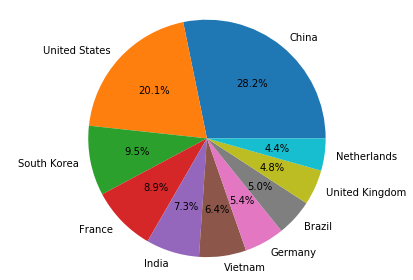

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

jsonResList = [json.loads(r) for r in resList]


countryList = []
for r in jsonResList:
    for d in r:
        countryList.append(d)
      
df = pd.DataFrame(countryList)
countDf = df.groupby('country').size().reset_index(name='counts')
top = countDf.nlargest(10, ["counts"])


fig1, ax1 = plt.subplots()
ax1.pie(top["counts"], labels = top["country"],
        autopct='%1.1f%%')
ax1.axis('equal')  
plt.tight_layout()

plt.savefig('hackpie.png')
plt.show()


In [5]:
times=[]
with open("oct2019.txt") as infile:
    for line in infile:
        parts = line.split()
        times.append(parts[6].split(":")[0])
times

['23',
 '23',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '21',
 '21',
 '21',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',

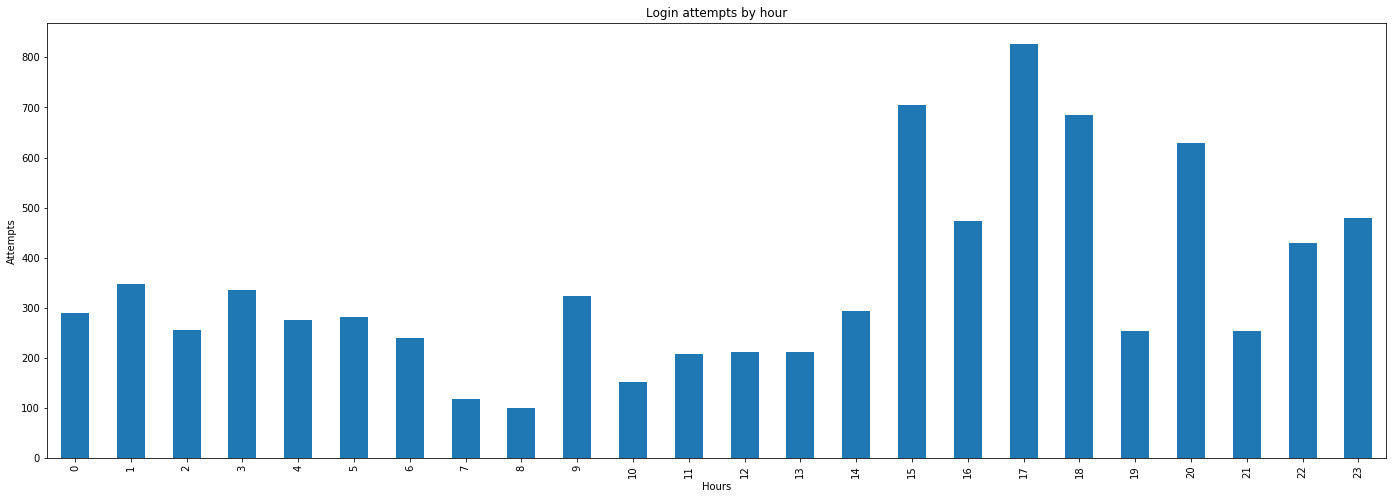

In [6]:
df = pd.DataFrame(times)
df.columns=["login"]
timesDf= df.groupby("login").size().reset_index(name='counts')
timesDf

ax = timesDf['counts'].plot(kind='bar', figsize=(24,8), title="Login attempts by hour")
ax.set_xlabel("Hours")
ax.set_ylabel("Attempts")

plt.savefig('hackbar.png')

In [12]:
countDf

,country,counts
0,Angola,1
1,Antigua and Barbuda,1
2,Argentina,12
3,Armenia,1
4,Australia,11
...,...,...
78,United Kingdom,45
79,United States,188
80,Venezuela,3
81,Vietnam,60
